In [34]:
%matplotlib inline

In [198]:
from striplog import Striplog
import welly
import glob

In [199]:
# get well header coordinates
well_heads = {'alpha': {'kb_coords':(0,0,0)},
              'beta': {'kb_coords':(10,10,0)}, 
              'gamma': {'kb_coords':(12,0,0)}, 
              'epsilon': {'kb_coords':(20,0,0)}}

In [167]:
w_params = {'name': 'alpha',
            'header': {'uwi':1001, 'name':'alpha'},
            }

In [197]:
# Make one well
w.location

AttributeError: 'Well' object has no attribute 'location'

In [173]:
w.data['striplog'] = striplog_dict['alpha']

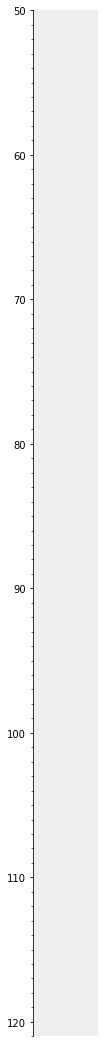

In [177]:
w.data['striplog']

In [136]:
w2 = welly.Well.from_las('test_data/P-129_out.LAS')

In [139]:
w2.location

Location({'td': 1935.0, 'crs': CRS({}), 'location': 'Lat = 45* 12\' 34.237" N', 'country': 'CA', 'province': 'Nova Scotia', 'section': '45.20 Deg N', 'range': 'PD 176', 'township': '63.75 Deg W', 'kb': 94.8, 'gl': 90.3, 'tdd': 1935.0, 'tdl': 1935.0, 'deviation': None, 'position': None})

In [ ]:
# Make a project of well objects



In [8]:
topsfiles = glob.glob('test_data/*.tops')

In [113]:
# Make Striplogs

In [126]:
my_striplogs = []

for file in topsfiles:
    with open(file) as f:
        text = f.read()
        striplog = Striplog.from_csv(text=text)
        my_striplogs.append(striplog)
        
striplog_dict = {'alpha': my_striplogs[1],
          'beta': my_striplogs[2],  
          'gamma': my_striplogs[3], 
          'epsilon': my_striplogs[0]}

In [180]:
for interval in striplog_dict['alpha']:
    print(interval.name, interval.top.middle)

AttributeError: 'Interval' object has no attribute 'name'

In [33]:
import matplotlib.pyplot as plt

In [200]:
rows = []
for wellname in striplog_dict.keys():
    for i, interval in enumerate(striplog_dict[wellname]):
            surface_name = interval.data['formation']
            surface_base = interval.base.middle
            x,y = well_heads[wellname]['kb_coords'][:-1]
            series = 1
            rows.append([x, y, surface_base, surface_name, series, wellname])

In [201]:
import pandas as pd

In [202]:
column_names = ['X','Y','Z','formation', 'series','wellname']

In [203]:
df = pd.DataFrame(rows, columns=column_names)

In [204]:
df

,X,Y,Z,formation,series,wellname
0,0,0,75.0,miguel,1,alpha
1,0,0,100.0,evan,1,alpha
2,0,0,120.0,brian,1,alpha
3,0,0,121.0,dieter,1,alpha
4,10,10,100.0,miguel,1,beta
5,10,10,130.0,brian,1,beta
6,10,10,131.0,dieter,1,beta
7,12,0,75.0,miguel,1,gamma
8,12,0,100.0,evan,1,gamma
9,12,0,130.0,brian,1,gamma
